In [1]:
# Data treatment
import pandas as pd
import numpy as np
# Graphics
from matplotlib import pyplot as plt
# Statistical Models
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics

In [2]:
#Data preparation
df = pd.read_excel('Data.xlsx') # Change the name of the file for different results
df['month_day'] = df['Created Date'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m-%d'))
variables = pd.concat([df['Order Value € (Gross)'].round(0), df['month_day']],  axis = 1)
datos = variables.groupby(by=['month_day']).count().reset_index()
datos = datos.rename(columns={'month_day': 'Day', 'Order Value € (Gross)': 'Order count'})
datos.head()

,Day,Order count
0,2020-01-01,1006
1,2020-01-02,1230
2,2020-01-03,1186
3,2020-01-04,953
4,2020-01-05,986


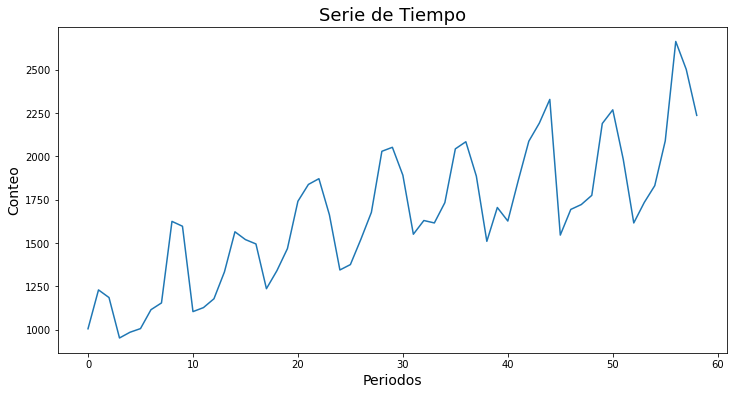

In [3]:
#Graphic
plt.figure(figsize = (12, 6))
plt.plot(datos.index, (datos['Order count']))

plt.xlabel("Periodos", fontsize = 14)
plt.ylabel("Conteo", fontsize = 14)
plt.title("Serie de Tiempo", fontsize = 18)
plt.show()

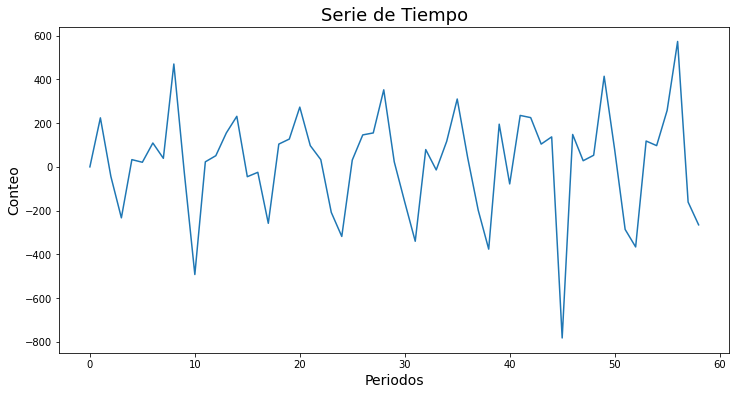

In [4]:
#Return stationary Series and Graph

datos_diff = pd.concat([datos['Day'], datos['Order count'].diff().fillna(0).astype(int)],  axis = 1) 
plt.figure(figsize = (12, 6))
plt.plot(datos_diff.index, (datos_diff['Order count']))

plt.xlabel("Periodos", fontsize = 14)
plt.ylabel("Conteo", fontsize = 14)
plt.title("Serie de Tiempo", fontsize = 18)
plt.show()

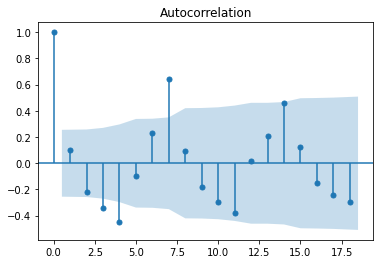

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


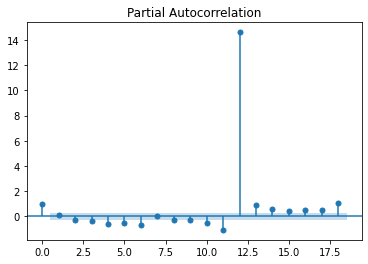

In [5]:
# Autocorrelation graphs to determine the model
plot_acf(datos_diff['Order count'])
plt.show()

plot_pacf(datos_diff['Order count'])
plt.show()


In [6]:
# Generate the model from the observations
Arima_model_1 = ARIMA(datos['Order count'], order=(2,1,2)).fit(transparams=False)
Arima_model_1.summary()

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likeli

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Order count   No. Observations:                   58
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -380.306
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 16 Sep 2021   AIC                            772.611
Time:                        19:23:23   BIC                            784.974
Sample:                             1   HQIC                           777.427
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  22.2988     21.185      1.053      0.293     -19.223      63.821
ar.L1.D.Order count     1.1126      0.090     12.303      0.000       0.935       1.290
ar.L2.D.Order count    -0.8439      0.213     -3.957      0.000      -1.262      -0.426
ma.L1.D.Order count    -1.4208      0.641     -2.216      0.027      -2.677      -0.164
ma.L2.D.Order count     0.6090      0.105      5.824      0.000       0.404       0.814
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6593           -0.8663j            1.0886           -0.1465
AR.2            0.6593           +0.8663j            1.0886            0.1465
MA.1            1.1665           -0.5304j            1.2814           -0.0679
MA.2            1.1665           +0.5304j            1.2814            0.0679
-----------------------------------------------------------------------------
"""

In [8]:
# Generate Forecast Results
train = datos.iloc[:-30]
test = datos.iloc[-30:]

mod = ARIMA(datos['Order count'], order=(2,1,2))
model = mod.fit(transparams=False)

start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)


29    2017.760191
30    1828.249174
31    1640.457676
32    1490.187352
33    1767.984465
34    1851.154805
35    1966.610221
36    2124.997637
37    1989.102381
38    1768.924406
39    1580.125031
40    1920.442585
41    1884.946284
42    2059.482962
43    2102.272228
44    2023.846275
45    2030.869810
46    1450.758854
47    1893.969644
48    2037.046058
49    2094.229762
50    2326.969532
51    2164.350838
52    1836.597108
53    1668.790044
54    1963.445825
55    2083.551609
56    2222.107882
57    2476.449494
58    2087.668299
dtype: float64


C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likeli

<AxesSubplot:>

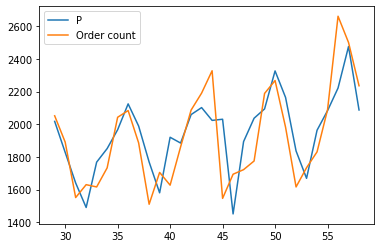

In [9]:
# Graph Results de la Prueba
pred.plot(legend = True)
plt.legend(labels= 'Predict')
test['Order count'].plot(legend = True)

C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likeli

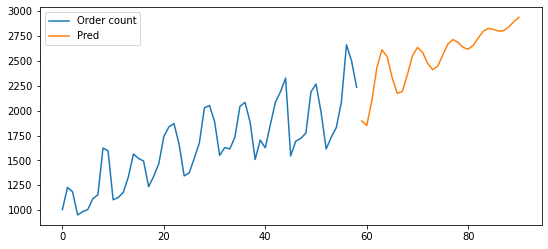

In [11]:
# Generate Forecast Results
train = datos.iloc[:-30]
test = datos.iloc[-30:]

mod = ARIMA(datos['Order count'], order=(2,1,2))
model = mod.fit(transparams=False)

start = len(datos['Order count'])
end = len(datos['Order count']) + 31 # Days for March
pred = model.predict(start=start, end=end, typ='levels')


fig, ax=plt.subplots(figsize=(9, 4))
datos.plot(ax=ax, label='train')
pred.plot(ax=ax, label='Pred')
ax.legend();







In [ ]:
# Export the data to Excel

pred.to_excel('Orders for March.xlsx')